## Load Wine Dataset

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
wine_data = datasets.load_wine()

In [2]:
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [3]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## import data to Dataframe

In [4]:
import pandas as pd
pd.DataFrame(wine_data.data,columns=wine_data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Train Test Split

In [9]:
# Separate the data and target variable
X = wine_data.data
y = wine_data.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
stratify=y)

## Test Accuracy using accuracy_score

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier() #Instantiate tree class
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9259259259259259

## Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.23)


## Decision Tree Visualization using plot_tree

[Text(880.934,338.617,'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(532.658,277.05,'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(327.789,215.483,'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(163.895,153.917,'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(81.9474,92.35,'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(245.842,92.35,'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(491.684,153.917,'X[1] <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(409.737,92.35,'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(573.632,92.35,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(737.526,215.483,'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(655.579,153.917,'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(819.474,153.917,'X[0] <= 13.175\ngini = 0.061\nsamples = 63\nvalue = [2, 61, 0]'),
 Text(737.526,92.35,'gini = 0.0\nsamples

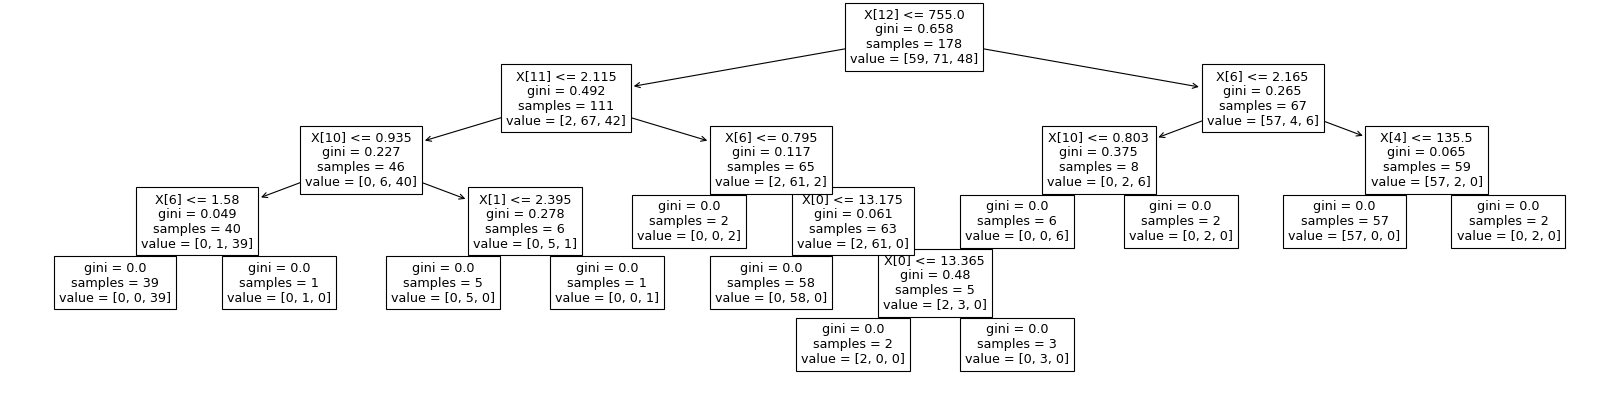

In [13]:
%matplotlib inline
from matplotlib.pyplot import figure
from sklearn.tree import plot_tree
figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plot_tree(clf.fit(wine_data.data, wine_data.target)) 

## Visualizing Training data on Scatter Plot

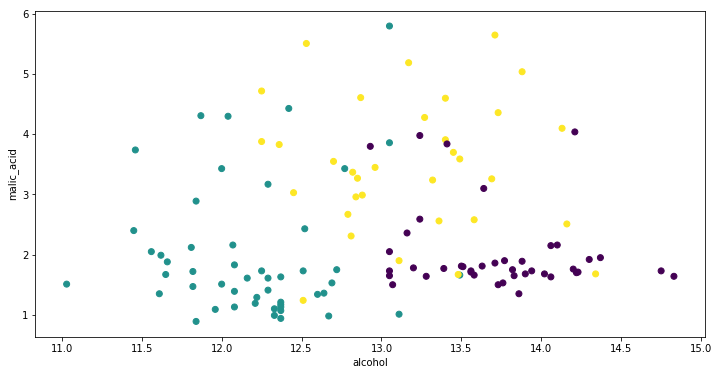

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=((12,6)))
plt.xlabel(wine_data.feature_names[0])
plt.ylabel(wine_data.feature_names[1])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

## GridSearch CV

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'criterion':['gini','entropy'], 'max_depth' :
[3,5,7,20]}
grid_search = GridSearchCV(clf,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [16]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
# Validate Accuracy with best estimator
from sklearn.metrics import accuracy_score
y_pred_gs = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.9259259259259259

In [23]:
# Check All Criteria and their respective Scores
grid_search.cv_results_['params'],grid_search.cv_results_['mean_test_score']

([{'criterion': 'gini', 'max_depth': 3},
  {'criterion': 'gini', 'max_depth': 5},
  {'criterion': 'gini', 'max_depth': 7},
  {'criterion': 'gini', 'max_depth': 20},
  {'criterion': 'entropy', 'max_depth': 3},
  {'criterion': 'entropy', 'max_depth': 5},
  {'criterion': 'entropy', 'max_depth': 7},
  {'criterion': 'entropy', 'max_depth': 20}],
 array([0.911     , 0.871     , 0.911     , 0.903     , 0.903     ,
        0.91966667, 0.895     , 0.91166667]))

## Decision Surface of Decision Tree

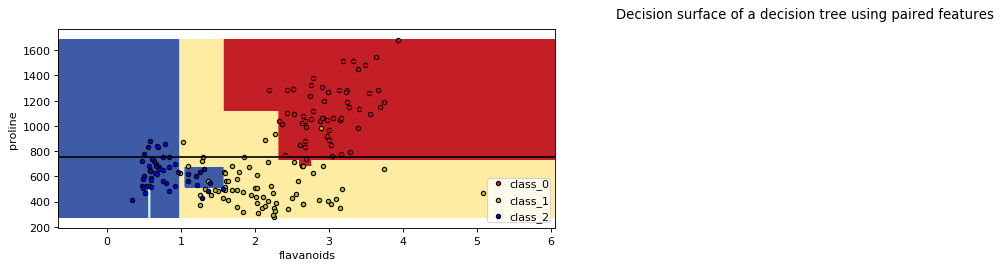

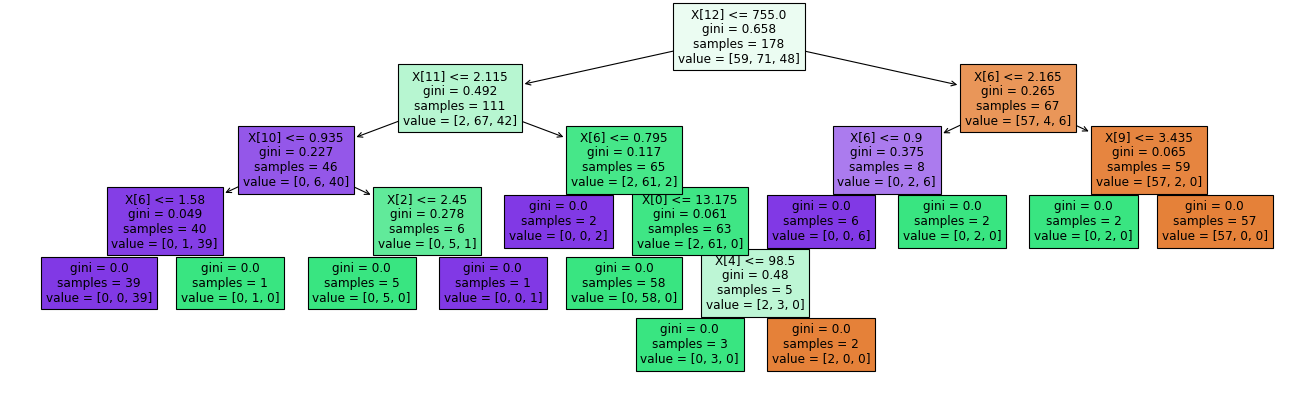

In [24]:
# We only take the two corresponding features
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.tree import plot_tree
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

#parameters
pair = [6,12]
pairidx = 0
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

X = wine_data.data[:, pair]
y = wine_data.target

# Train
clf = grid_search.best_estimator_.fit(X, y)

# Plot the decision boundary
plt.subplot(2, 3, pairidx + 1)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(wine_data.feature_names[pair[0]])
plt.ylabel(wine_data.feature_names[pair[1]])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine_data.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.axhline(y = 755,
color='black')

plt.figure()
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
clf = DecisionTreeClassifier().fit(wine_data.data, wine_data.target)
plot_tree(clf, filled=True)
plt.show()

## Feature Importance

In [25]:
#Feature Importance
importances=clf.feature_importances_

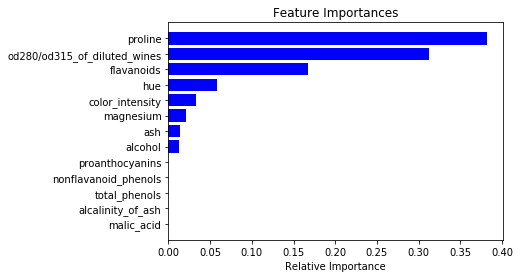

In [26]:
features = wine_data['feature_names']
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Extract Decision rule as text 

In [27]:
from sklearn.tree.export import export_text
tree_rules = export_text(clf, feature_names=wine_data.feature_names)

C:\Users\vbabu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
print(tree_rules)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- ash <= 2.45
|   |   |   |   |--- class: 1
|   |   |   |--- ash >  2.45
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- magnesium <= 98.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- magnesium >  98.50
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- color_intensity <= 3.43
|   |   |   |--- 